In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
# print(recent_grads.iloc[0])
# print(recent_grads.head())
# print(recent_grads.tail())
# print(recent_grads.describe())

In [2]:
recent_grads.shape

(173, 21)

In [3]:
recent_grads = recent_grads.dropna()
recent_grads.shape

(172, 21)

# Scatter Plots

Questions to be answered in this section:
1. Do students in more popular majors make more money?
2. Do students that majored in subjects that were majority female make more money?
3. Is there any link between the number of full-time employees and median salary?

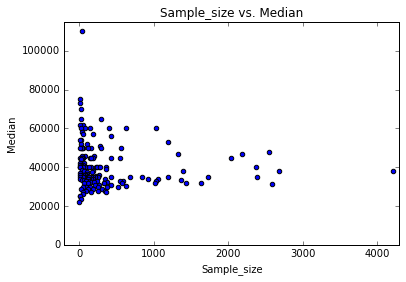

In [4]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter',
                 title='Sample_size vs. Median', ylim=(0,115000),
                 xlim=(-200,4300))

The above plot shows *Sample_size* plotted against *Median*.  *Sample_size* can be used to determine the 'popularity' of a major.  The higher the sample size is for a given major, the more popular it is.  There appears to be little correlation between *Sample_size* and *Median*, so I conclude that students in more popular majors do not make more money than students in less popular majors.

One thing that I do notice about more popular majors in this plot is that students in more popular majors (*Sample_size* > 2000), tend to make a more consistent amount (about \$30,000 to \$50,000), while less popular majors have much more variation in their median salary.

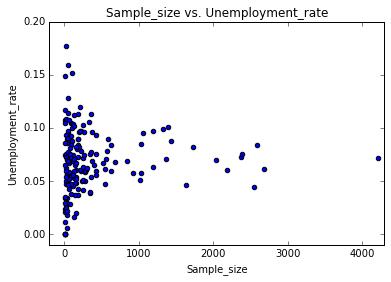

In [5]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter',
                 title='Sample_size vs. Unemployment_rate', xlim=(-200,4300),
                 ylim=(-.01,.2))

This plot shows *Sample_size* plotted against *Unemployment_rate*.  Once again, there does not appear to be any strong correlation between these two variables, leading me to conclude that students in a more popular major do not have a higher or lower unemployment rate than students in less popular majors.  

Similarly to the last plot, students in more popular majors (> 2000) tend to have a more consistent unemployment rate between 0.05 and about 0.08.  This variation grows as *Sample_size* gets smaller.  When *Sample_size* is between 1000 and 2000, the unemployment rate is between 0.05 and 0.10.  And then majors with *Sample_size* less than 1000 varies between 0 and 0.18.

Now to answer the question "Do students in more popular majors make more money?"

I have shown using these last two plots that there is no evidence that students in more popular majors make more money, on average.

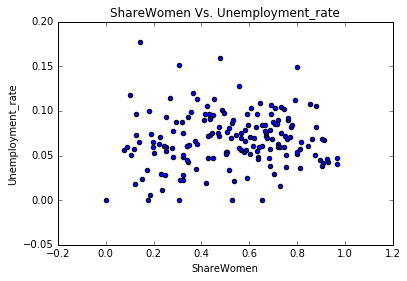

In [7]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter',
                 title='ShareWomen Vs. Unemployment_rate')

Moving onto question 2, I will be analyzing if there is any connection between the proportion of women in a major and salary.

Taking a look at the plot above, *ShareWomen* is plotted against *Unemployment_rate*.  The plot appears to be uniformly scattered, indicating that there is no correlation between the two variables.

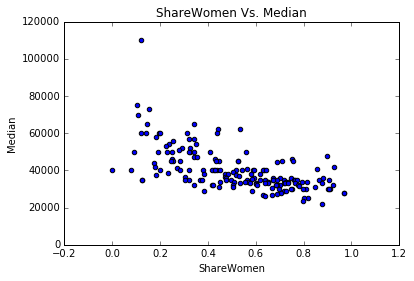

In [10]:
recent_grads.plot(x='ShareWomen',y='Median',kind='scatter',
                 title='ShareWomen Vs. Median')

There does appear to be a negative correlation between *ShareWomen* and *Median*, as you can see in the plot above.

I think that this plot is enough evidence for me to conclude that students that majored in subjects that were majority female make less money on average than students that majored in subjects that were not majority female.

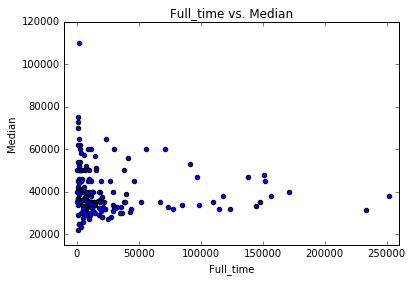

In [6]:
recent_grads.plot(x='Full_time',y='Median', kind='scatter',
                 title='Full_time vs. Median', xlim=(-10000,260000),
                 ylim=(15000,120000))

The plot above compares *Full_time* and *Median*.  *Full_time* is a measure of how many recent graduates from each major work more than 35 hours per week.    

This plot appears to have a weak, negative correlation.  As *Full_time* increases, *Median* appears to generally decrease.  There are a few data points that are near *Full_time* = 0 that have median salaries over \$60,000.  The last two data points near the \$60,000 mark as *Full_time* increases are between 50,000 and 100,000.  All data points beyond this have *Median* < \$60,000.  Once you get past 150,000 for *Full_time*, all of the data points appear to be less than \$40,000.

All of this leads me to conclude that there is a weak, negative correlation between these two variables.

To answer question 3, there is evidence of a link between the number of full-time employees and median salary, but I do not believe that there is enough evidence to determine anything conclusive.

# Extra Scatter Plots

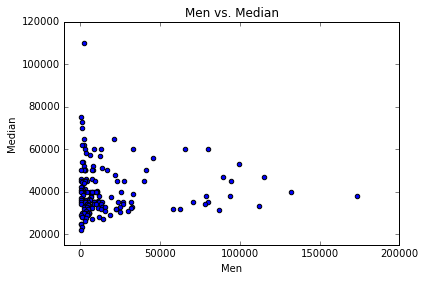

In [8]:
recent_grads.plot(x='Men',y='Median',kind='scatter',title='Men vs. Median',
                 xlim=(-10000,200000),ylim=(15000,120000))

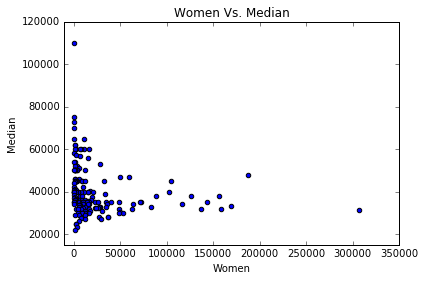

In [9]:
recent_grads.plot(x='Women', y='Median', kind='scatter',
                 title='Women Vs. Median', xlim=(-10000,350000),
                 ylim=(15000,120000))

# Histograms

Questions to be answered:
1. What percent of majors are predominantly male? Predominantly female?
2. What's the most common median salary range?

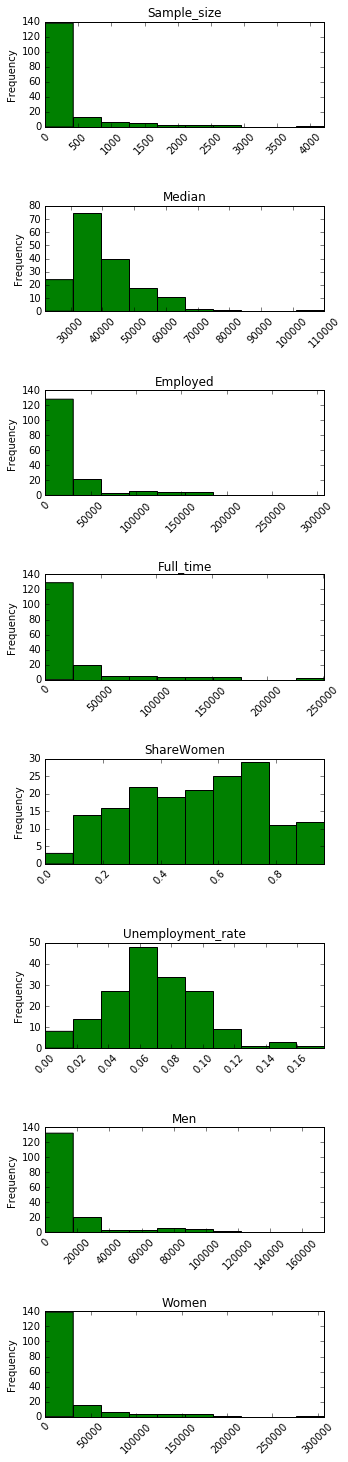

In [53]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time',
       'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

fig = plt.figure(figsize=(5,25))
for r in range(1,9):
    ax = fig.add_subplot(8,1,r)
    ax = fig.subplots_adjust(hspace=0.75)
    ax = recent_grads[cols[r-1]].plot(kind='hist',rot=45,
                                     color='green', bins=10)
    ax.set_title(cols[r-1])
    ax.set_xlim((recent_grads[cols[r-1]].min(),
           recent_grads[cols[r-1]].max()))

These are also plots that I was given instructions to generate for this project, but I don't think that they are all necessary to answer the questions listed above, so I'm going to trim these plots down a little bit

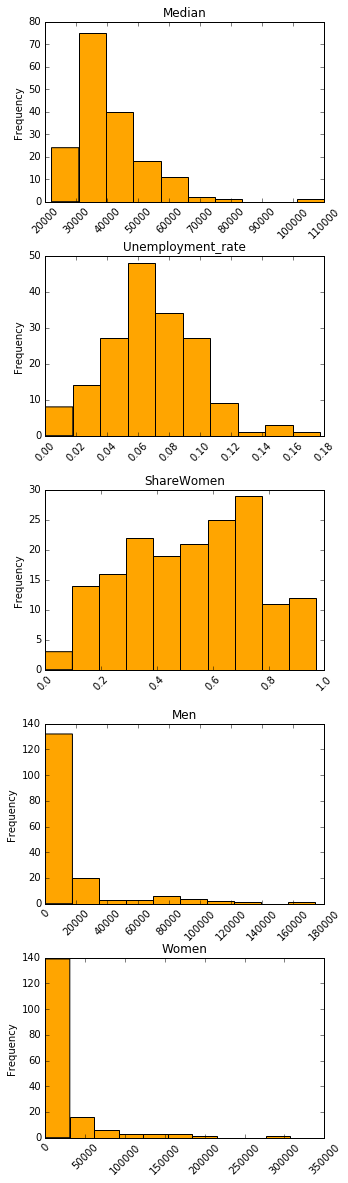

In [59]:
cols = ['Median','Unemployment_rate','ShareWomen','Men','Women']

fig = plt.figure(figsize=(5,20))
for r in range(1,6):
    ax = fig.add_subplot(5,1,r)
    ax = fig.subplots_adjust(hspace=0.3)
    ax = recent_grads[cols[r-1]].plot(kind='hist',rot=45,
                                     color='orange', bins=10)
    ax.set_title(cols[r-1])

# Pandas, Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d48540320>,
      dtype=object)

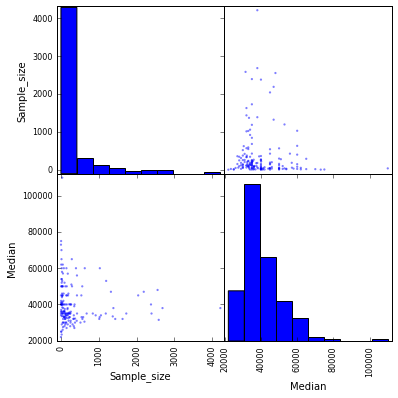

In [2]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d4632a240>,
      dtype=object)

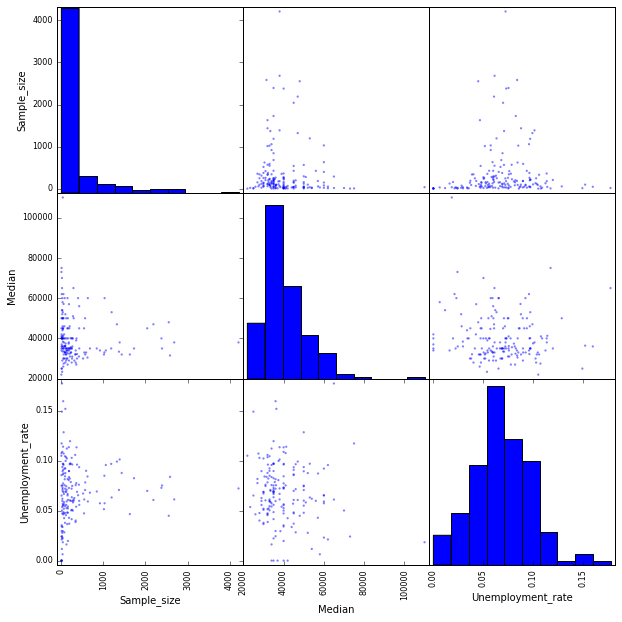

In [3]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

# Pandas, Bar Plots

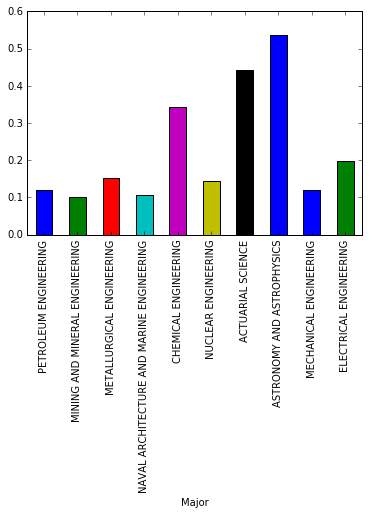

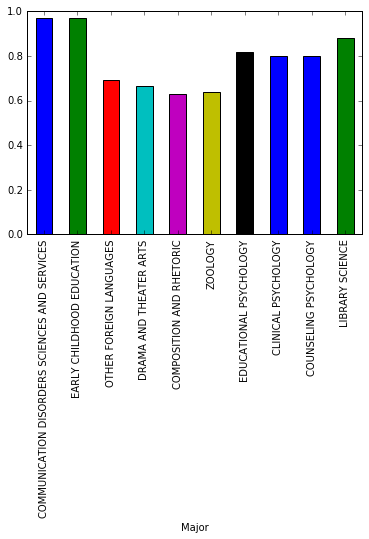

In [4]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)